!git clone https://github.com/Taynguyen4488/ComputerVision.git
%cd ComputerVision


Project 1: BIỂU DIỄN ẢNH MÀU VÀ LỌC TÍN HIỆU


# Setup

In [35]:
!pip install opencv-python matplotlib numpy

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time
time.sleep(0.1)
%matplotlib inline

In [38]:
from google.colab import files
uploaded = files.upload()

# Sample image

In [40]:
image_paths = ["image1.jpg", "image2.jpg"]
def show_group(title_list, img_list, cmap_list=None):
    n = len(img_list)
    plt.figure(figsize=(15,5))
    for i in range(n):
        plt.subplot(1, n, i+1)
        if cmap_list and cmap_list[i]:
            plt.imshow(img_list[i], cmap=cmap_list[i])
        else:
            plt.imshow(img_list[i])
        plt.title(title_list[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

for path in image_paths:
    if not os.path.exists(path):
        print(f"Không tìm thấy {path}")
        continue

    print(f"\nĐang xử lý: {path}")



Đang xử lý: image1.jpg

Đang xử lý: image2.jpg


# Load image

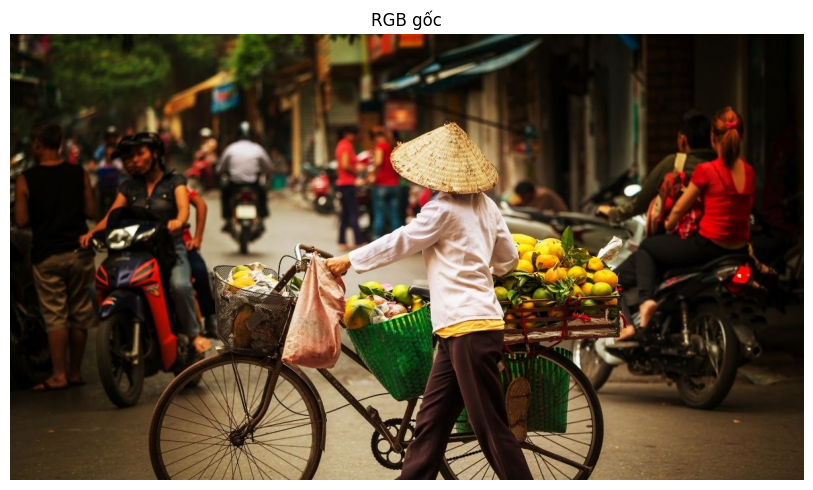

In [41]:
img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
show_group(["RGB gốc"], [img_rgb])

# PHẦN 1: BIỂU DIỄN ẢNH MÀU VÀ ẢNH XÁM

# Tách kênh


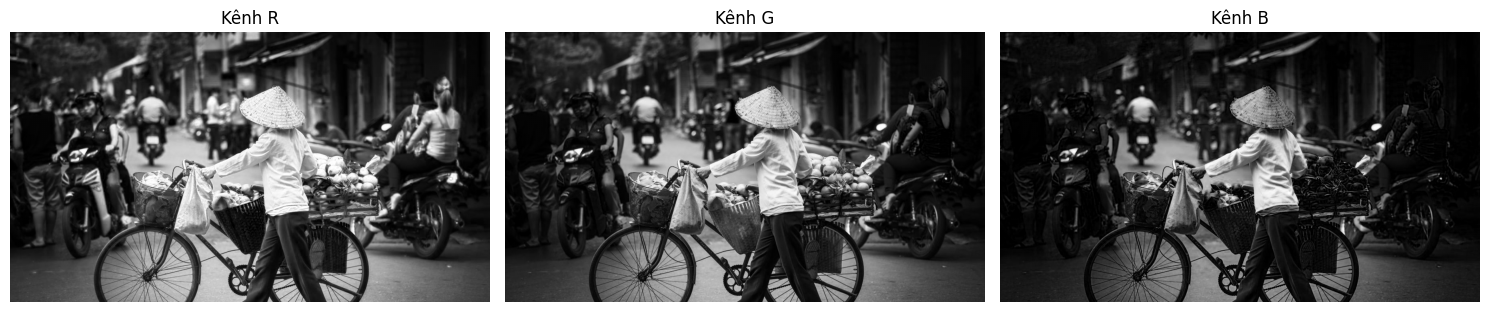

In [42]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
show_group(
        ["Kênh R", "Kênh G", "Kênh B"],
        [R, G, B],
        ["gray", "gray", "gray"]
    )

# Chuyển ảnh xám bằng 3 thuật toán

# Dùng thuật toán ẩn trong Opencv

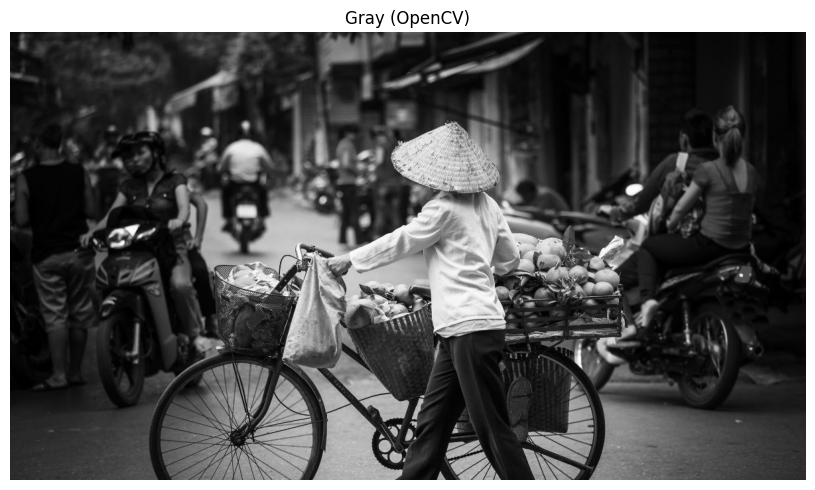

In [43]:
gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
show_group(["Gray (OpenCV)"], [gray_cv], ['gray'])


# Dùng công thức Chuẩn
Gray = (0.299 * R + 0.587 + G + 0.114 * B)

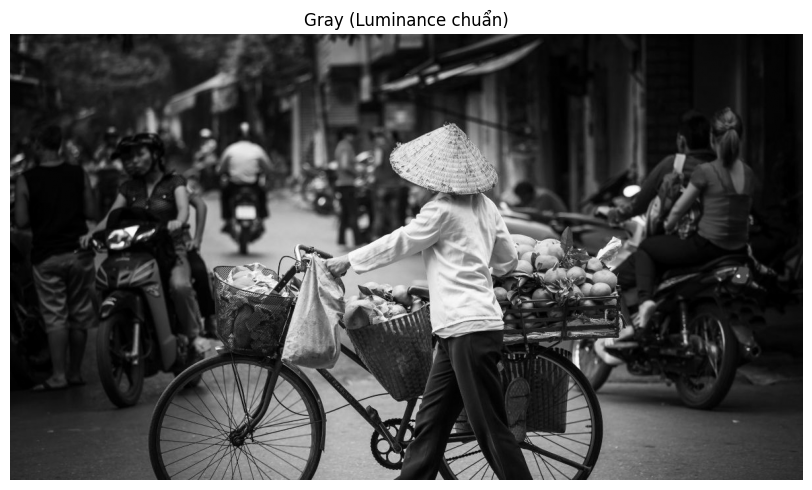

In [44]:
gray_luminance = (
        0.299 * R +
        0.587 * G +
        0.114 * B
    ).astype(np.uint8)
show_group(["Gray (Luminance chuẩn)"], [gray_luminance], ['gray'])

# Dùng công thức chia trung bình 3 kênh
Y = (R + G + B) / 3

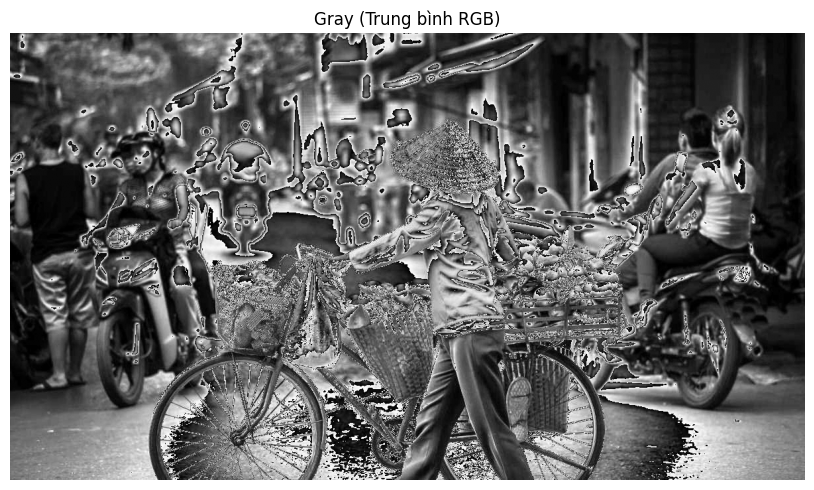

In [45]:
gray_average = ((R + G + B) / 3).astype(np.uint8)
show_group(["Gray (Trung bình RGB)"], [gray_average], ['gray'])

# Tái tạo lại kênh màu

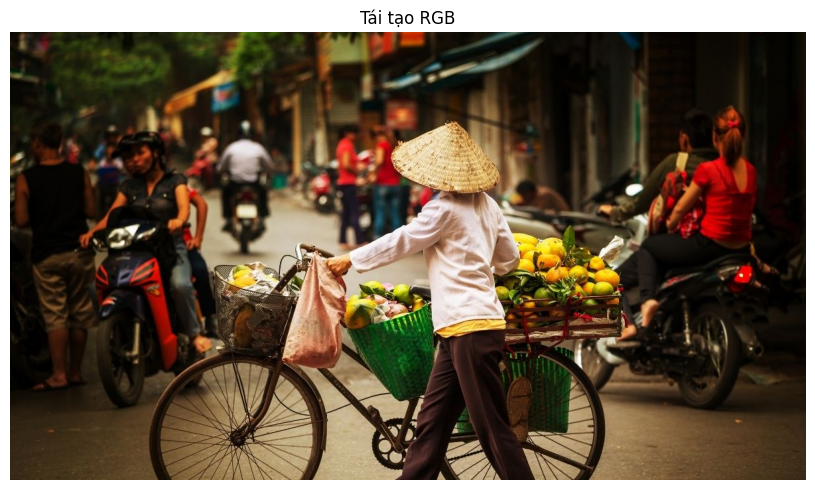

In [46]:
gray_to_rgb = cv2.cvtColor(gray_cv, cv2.COLOR_GRAY2RGB)
reconstructed = np.stack((R, G, B), axis=2)
show_group(["Tái tạo RGB"], [reconstructed])

# Hoán đổi kênh
swap (R, G, B) Thành (B, R, G)

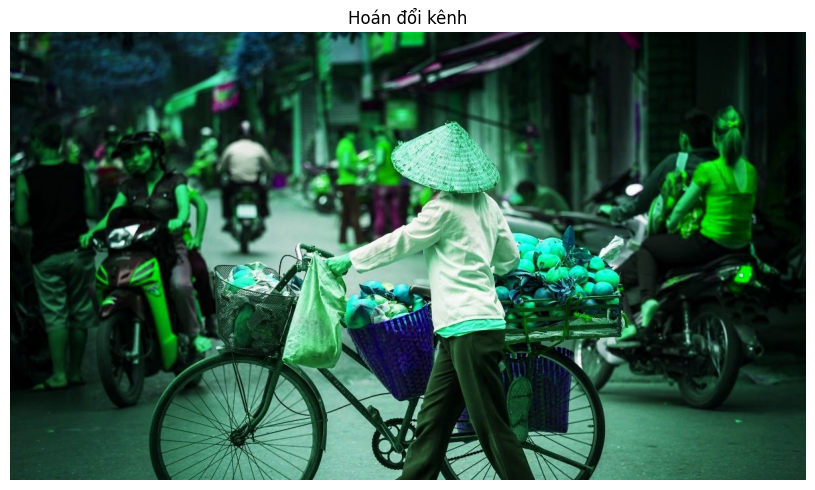

In [47]:
swap = np.stack((B, R, G), axis=2)
show_group(["Hoán đổi kênh"], [swap])

Phần 2: LỌC ẢNH VỚI LOW-PASS VÀ HIGH-PASS FILTER

# Low-Pass Filter sử dụng kernel mean và Gaussian

Đang xử lý: image1.jpg


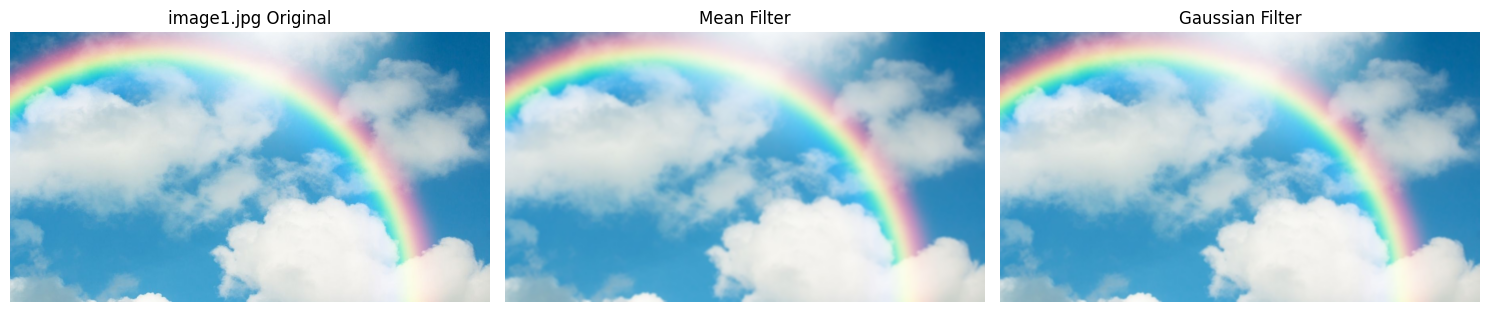

Đang xử lý: image2.jpg


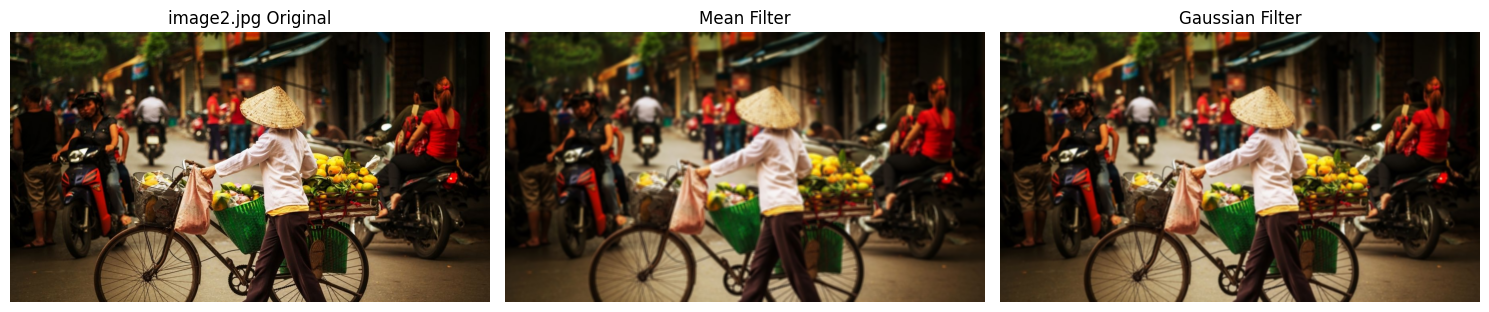

In [48]:
for path in image_paths:
    if not os.path.exists(path):
        print("Không tìm thấy", path)
        continue

    print("Đang xử lý:", path)

    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # LOW PASS
    mean_blur = cv2.blur(img_rgb, (7,7))
    gaussian = cv2.GaussianBlur(img_rgb, (7,7), 0)

    show_group(
        [f"{path} Original", "Mean Filter", "Gaussian Filter"],
        [img_rgb, mean_blur, gaussian]
    )

# High-Pass Filter sử dụng kernel Laplacian và Sobel

Đang xử lý: image1.jpg


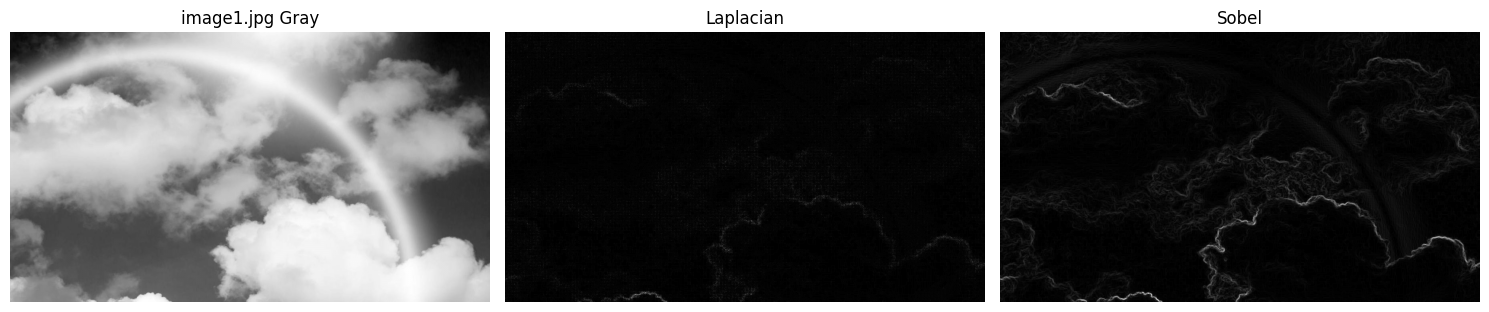

Đang xử lý: image2.jpg


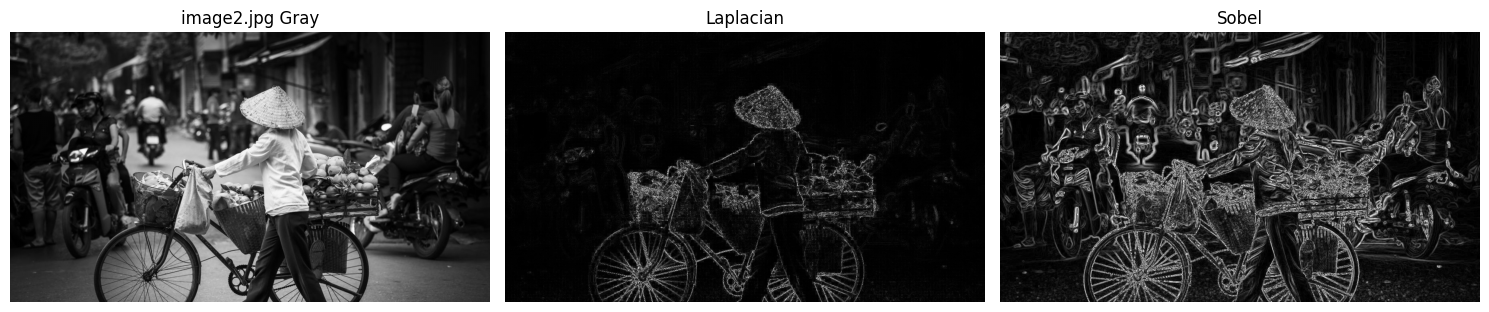

In [49]:
for path in image_paths:
    if not os.path.exists(path):
        print("Không tìm thấy", path)
        continue

    print("Đang xử lý:", path)

    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.uint8(np.sqrt(sobelx**2 + sobely**2))

    show_group(
          [f"{path} Gray", "Laplacian", "Sobel"],
          [gray, laplacian, sobel],
          cmap_list=['gray', 'gray', 'gray']
      )